In [1]:
import nbsetup
from models.load import load_sparc
from models.sparc.result import Result
from models.sparc.tune import Tune
from models.sparc.mcmc import mcmc

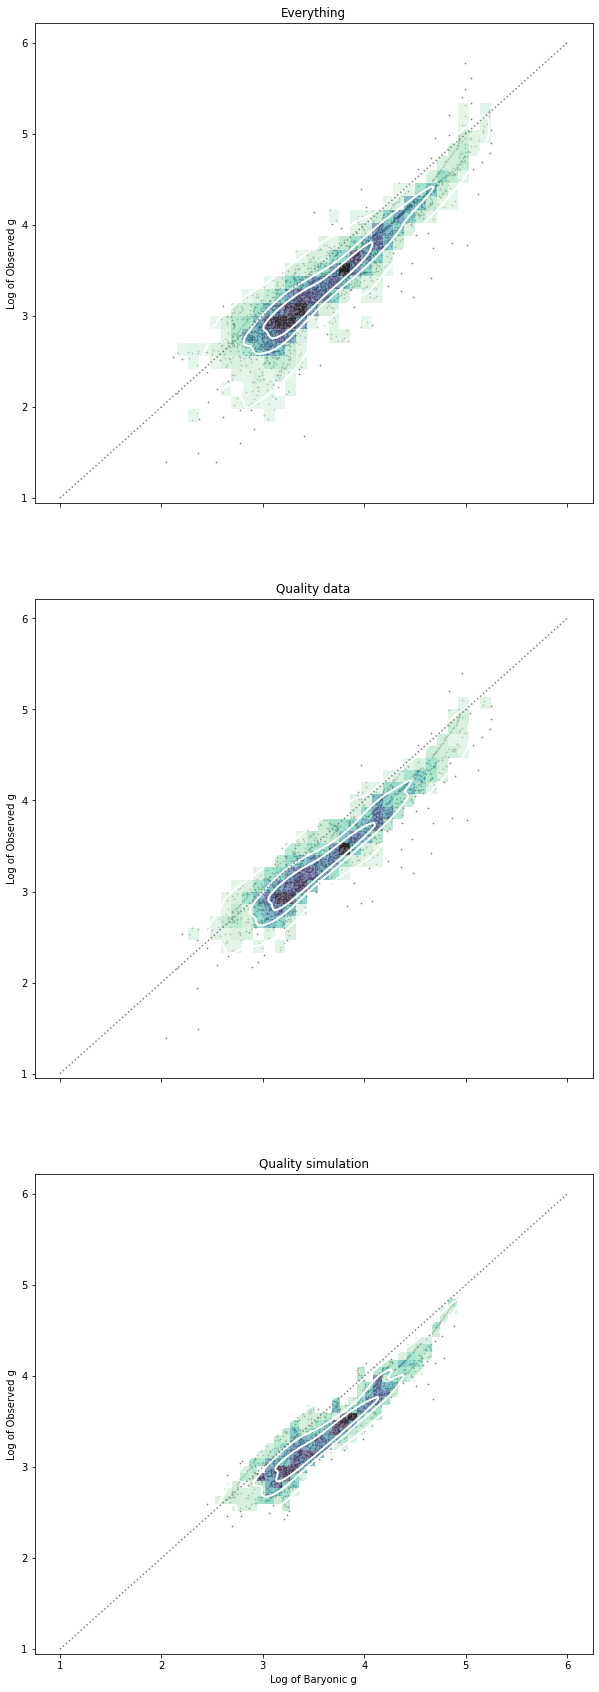

In [2]:
raw = Result(load_sparc(namespace='pmog/201_21'))
g = raw.plot_rar(kind=1)

In [3]:
analysis = Tune(mcmc(raw.datasets()['Quality simulation']))

In [ ]:
tuned = analysis.Result()

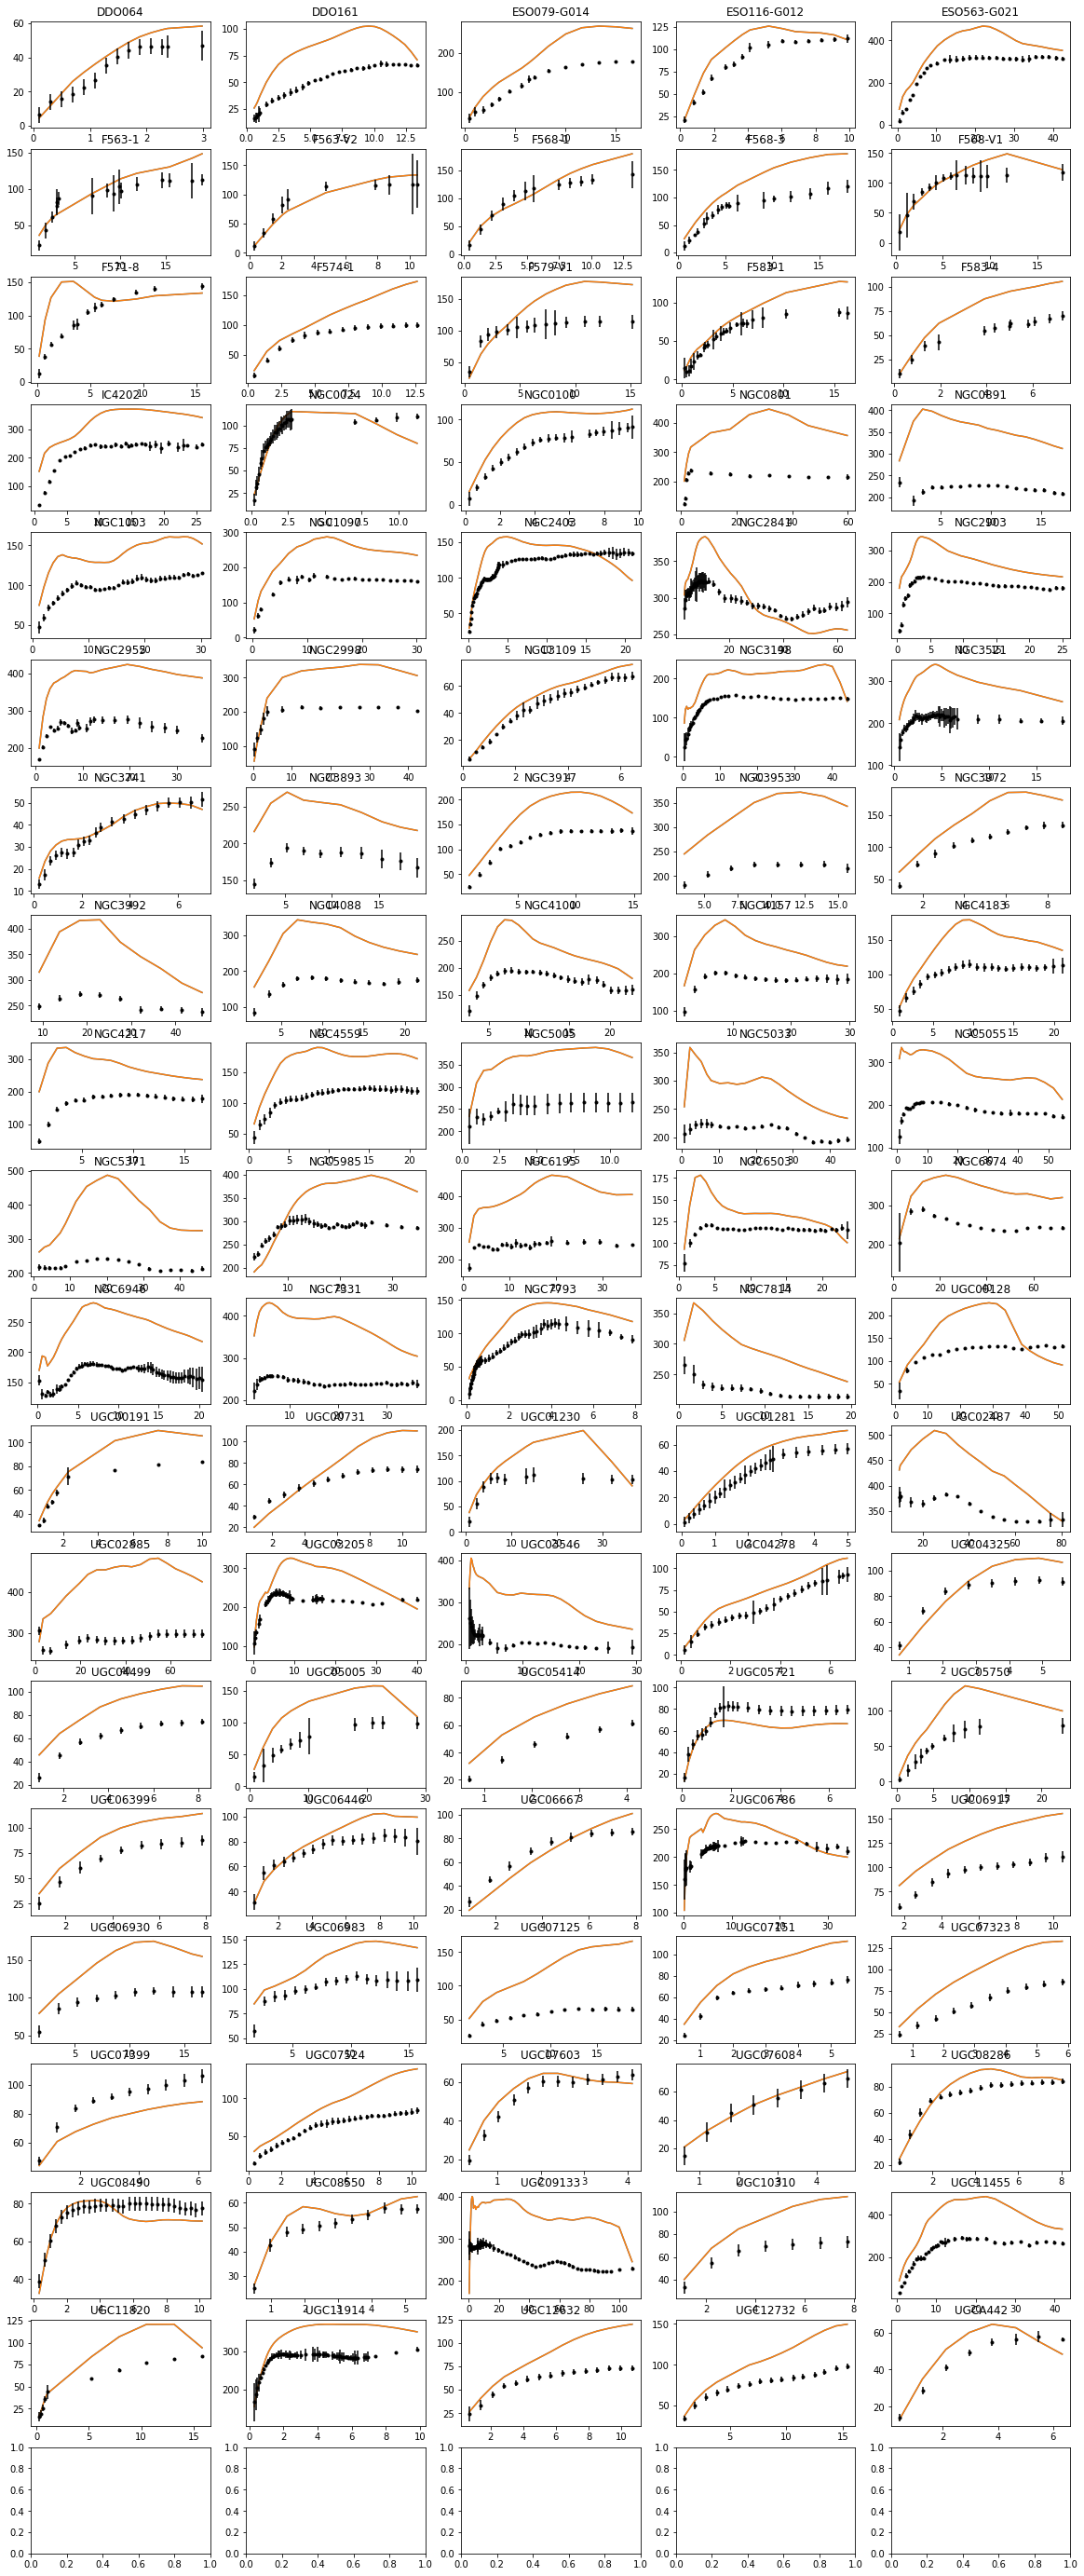

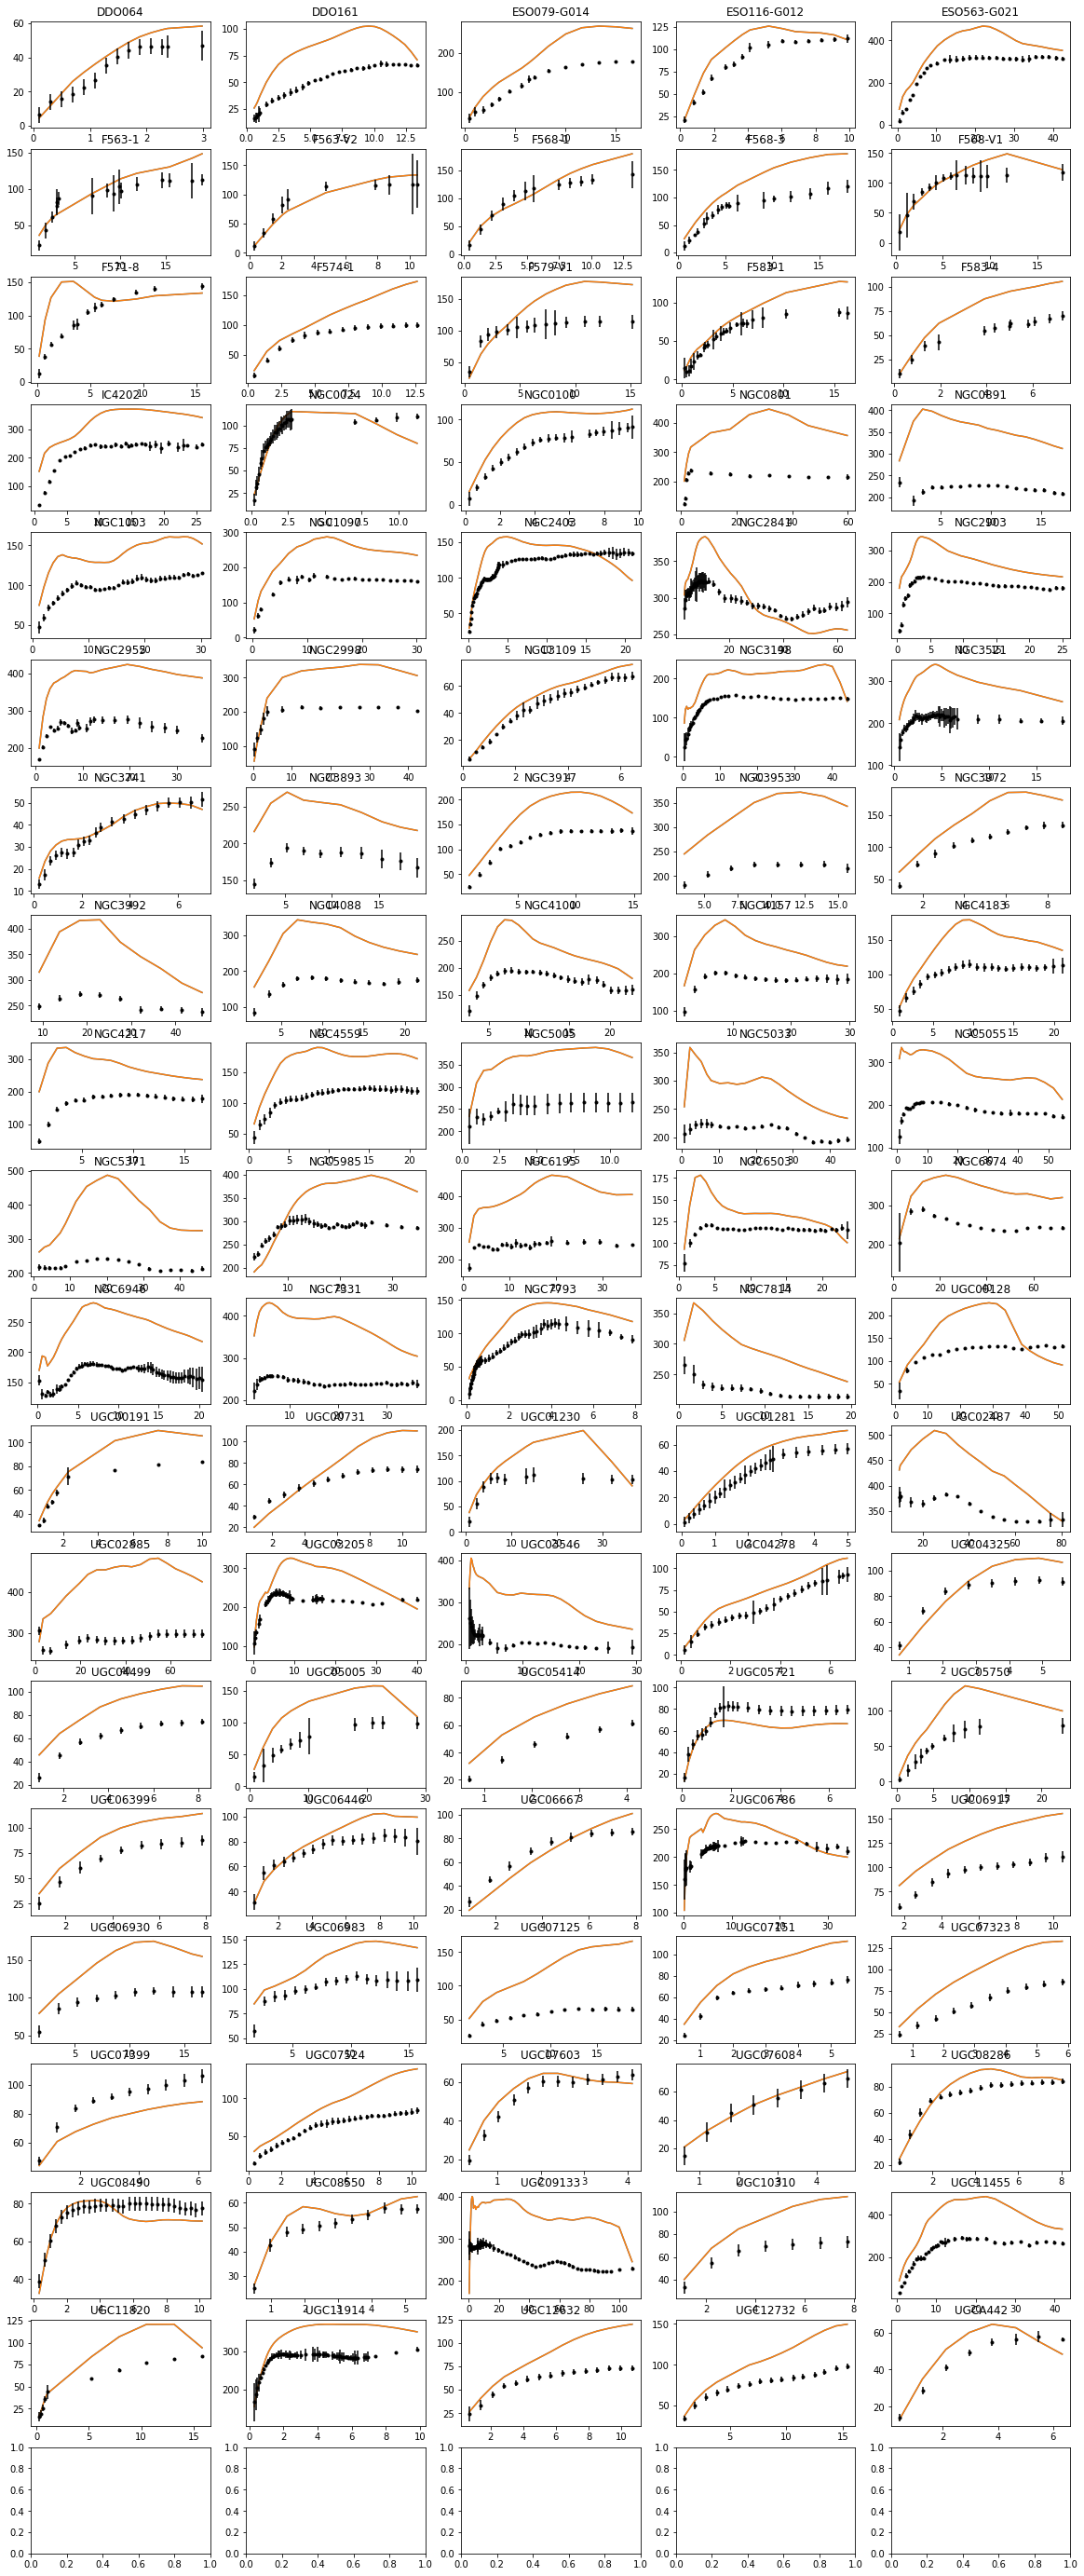

In [6]:
standard = Result(load_sparc(namespace='pmog/201_21'))
raw.plot_curves(standard)